In [116]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sympy import Function, Symbol, diff, cos, sin, tan, sec
from scipy.misc import derivative
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from scipy.spatial import distance

from sklearn.decomposition import PCA

%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [117]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [118]:
# Чем меньше угол между векторами, тем больше они похожи по косинусной метрике.

def cosineMetric(x, y):
    return np.dot(x, y) / np.linalg.norm(x) / np.linalg.norm(y)
    
for i in range(len(raitings)):
    user = raitings[i]
    best_match = np.empty(15)
    distance = 0
    for element in raitings:
        if np.array_equal(user, element) == False: # исключаем текущего пользователя
            current_distance = cosineMetric(user, element)
            if current_distance > distance:
                distance = current_distance
                best_match = element
    print(user, best_match)

[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6] [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
[ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7] [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]
[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
[ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2] [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]
[ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3] [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]
[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]
[ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]


In [119]:
# Для уменьшения размерности используем PCA.
pca = PCA(n_components=5)
principal_components_ratings = pca.fit_transform(raitings)
pca.explained_variance_ratio_

array([0.25373748, 0.1970209 , 0.14113306, 0.12956371, 0.11289928])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [120]:
# sympy
x = Symbol('x')
f = diff(tan(sin(x) + cos(2*x + 3))**2)

print(f'значение 1-ой производной в точке x = 1 |    {f.evalf(subs={x:1})}')

значение 1-ой производной в точке x = 1 |    55.3859176353379


In [121]:
# scipy
def f(x):
    return tan(sin(x) + cos(2*x + 3))**2

f1_value = derivative(f, 1.0, dx=1e-6)
print(f'значение 1-ой производной в точке x = 1 |    {f1_value}')

значение 1-ой производной в точке x = 1 |    55.3859176433136


### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [122]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [123]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [124]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

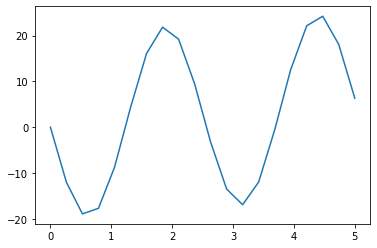

In [125]:
plt.plot(x, fx)
plt.show()

In [126]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [127]:
# Method Nelder-Mead
initial_params = np.array([-20, 20])
res = minimize(error, initial_params, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
res
print(f'оптимальные параметры a = {res.x[0]} , b = {res.x[1]}')

Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 83
         Function evaluations: 161
оптимальные параметры a = 3.000000000209087 , b = 21.37610416491102


In [128]:
# Differential Evolution
bounds = [(-20, 20), (-20, 20)]
result = differential_evolution(error, bounds)
print(f'оптимальные параметры a = {result.x[0]} , b = {result.x[1]}')

оптимальные параметры a = 3.000000000254991 , b = -2.499999999984849


С помощью алгоритма дифференциальной эволюции удалось найти более оптимальные параметры : a = 3, b = -2.5

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

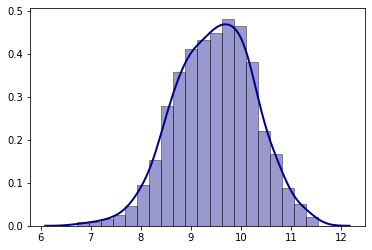

In [129]:
s = np.random.randint(20, size=(1000, 50))
unique_numbers = np.unique(s).size

sample_means = []

for sample in s:
    sample_means.append(np.mean(sample))

sns.distplot(sample_means, hist=True, kde=True, 
             bins=unique_numbers, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [130]:
m = np.array([[1, 4], [1, 1]])
lambdas, V =  np.linalg.eig(m)
print('Собственные значения - ', lambdas)
print('Собственные вектора - ', V)

Собственные значения -  [ 3. -1.]
Собственные вектора -  [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
